# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and test sets
* Fit a regression model to the dataset using the `statsmodels` library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [3]:
# Your code here - Manipulate column names
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [14]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [10]:
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [19]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = df.copy()
x_cols = x_cols.drop(columns='list_price')

In [20]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [21]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     519.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:10:23   Log-Likelihood:                -40691.
No. Observations:                8152   AIC:                         8.157e+04
Df Residuals:                    8057   BIC:                         8.224e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.0679      1.807     35.452      0.000      60.525      67.610
piece_count                                         77.5026      0.942     82.304      0.000      75.657      79.349
num_reviews                                          5.9892      0.695      8.619      0.000       4.627       7.351
play_star_rating                                     5.7216      0.634      9.021      0.000       4.478       6.965
star_rating                                         -1.4317      0.723     -1.980      0.048      -2.849      -0.014
val_star_rating                                     -8.8385      0.648    -13.647      0.000     -10.108      -7.569
ages_10                                            125.4967      6.803     18.447      0.000     112.161     138.832
ages_10_14                                         -22.4455      9.364     -2.397      0.017     -40.801      -4.090
ages_10_16                                         -12.3680      4.140     -2.987      0.003     -20.484      -4.252
ages_10_21                                          58.2328      7.610      7.652      0.000      43.315      73.151
ages_11_16                                         -23.6086      5.843     -4.040      0.000     -35.063     -12.155
ages_12                                             64.8693      5.660     11.460      0.000      53.774      75.965
ages_12_16                                         -60.5958      7.065     -8.577      0.000     -74.445     -46.747
ages_14                                             24.8032      4.160      5.962      0.000      16.648      32.958
ages_16                                             22.1002      6.204      3.562      0.000       9.939      34.262
ages_1half_3                                        -8.4645      2.448     -3.458      0.001     -13.263      -3.666
ages_1half_5                                        -3.6198      3.113     -1.163      0.245      -9.721       2.482
ages_2_5                                            15.1637      1.720      8.814      0.000      11.791      18.536
ages_4                                             -16.4088      6.442     -2.547      0.011     -29.038      -3.780
ages_4_7                                            -5.3134      3.398     -1.564      0.118     -11.975       1.348
ages_4_99                                           -3.5768      3.658     -0.978      0.328     -10.747       3.594
ages_5                                              -8.8943      3.285     -2.708      0.007     -15.333      -2.455
ages_5_12                                          -32.4002      3.145    -10.301      0.000     -38.566     -26.234
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [24]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.050].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

73 66
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.8746,1.592,40.131,0.000,60.755,66.995
piece_count,77.7189,0.919,84.537,0.000,75.917,79.521
num_reviews,5.9213,0.680,8.709,0.000,4.589,7.254
play_star_rating,5.7403,0.621,9.239,0.000,4.522,6.958
star_rating,-1.3679,0.708,-1.933,0.053,-2.755,0.019


In [25]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     750.6
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:11:21   Log-Likelihood:                -40707.
No. Observations:                8152   AIC:                         8.155e+04
Df Residuals:                    8086   BIC:                         8.201e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.1861      1.427     44.971      0.000      61.388      66.984
piece_count                                         77.7439      0.919     84.576      0.000      75.942      79.546
num_reviews                                          5.6999      0.641      8.894      0.000       4.444       6.956
play_star_rating                                     5.2223      0.532      9.814      0.000       4.179       6.265
val_star_rating                                     -9.5039      0.506    -18.767      0.000     -10.497      -8.511
ages_10                                            120.7941      4.753     25.417      0.000     111.478     130.110
ages_10_16                                          -8.1864      3.866     -2.118      0.034     -15.764      -0.608
ages_10_21                                          50.3251      3.367     14.948      0.000      43.726      56.924
ages_11_16                                         -19.5364      5.651     -3.457      0.001     -30.615      -8.458
ages_12                                             66.2023      6.198     10.682      0.000      54.053      78.351
ages_12_16                                         -56.0376      7.413     -7.559      0.000     -70.569     -41.506
ages_14                                             29.6770      4.757      6.239      0.000      20.353      39.001
ages_16                                             25.9606      6.893      3.766      0.000      12.448      39.473
ages_2_5                                            22.3825      1.916     11.682      0.000      18.627      26.138
ages_5                                              -7.3591      3.228     -2.280      0.023     -13.686      -1.032
ages_5_12                                          -26.6040      2.618    -10.164      0.000     -31.735     -21.473
ages_6                                             -19.3561      5.773     -3.353      0.001     -30.672      -8.040
ages_6_12                                          -14.9914      1.796     -8.346      0.000     -18.512     -11.470
ages_7_12                                          -14.1688      2.149     -6.593      0.000     -18.381      -9.956
ages_7_14                                          -10.5721      1.924     -5.493      0.000     -14.345      -6.800
ages_8                                              13.7344      4.532      3.031      0.002       4.851      22.618
ages_8_12                                          -13.9723      2.705     -5.165      0.000     -19.275      -8.669
ages_8_14                                           -9.7638      2.059     -4.742      0.000     -13.800      -5.728
ages_9                                   

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [28]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.050].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

63 58
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.3167,1.375,47.488,0.0,62.620,68.013
piece_count,77.7236,0.919,84.533,0.0,75.921,79.526
num_reviews,5.6932,0.641,8.882,0.0,4.437,6.950
play_star_rating,5.2202,0.532,9.807,0.0,4.177,6.264
val_star_rating,-9.5009,0.507,-18.756,0.0,-10.494,-8.508


In [29]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     854.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:12:43   Log-Likelihood:                -40717.
No. Observations:                8152   AIC:                         8.155e+04
Df Residuals:                    8094   BIC:                         8.196e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           66.1502      1.349     49.037      0.000      63.506      68.795
piece_count                                         77.7183      0.920     84.501      0.000      75.915      79.521
num_reviews                                          5.6830      0.641      8.864      0.000       4.426       6.940
play_star_rating                                     5.2120      0.532      9.790      0.000       4.168       6.256
val_star_rating                                     -9.5047      0.507    -18.758      0.000     -10.498      -8.511
ages_10                                            120.8505      4.755     25.414      0.000     111.529     130.172
ages_10_16                                          -8.2605      3.868     -2.136      0.033     -15.842      -0.679
ages_10_21                                          50.2523      3.369     14.918      0.000      43.649      56.855
ages_11_16                                         -19.6659      5.654     -3.478      0.001     -30.750      -8.582
ages_12                                             66.1197      6.200     10.664      0.000      53.965      78.274
ages_12_16                                         -55.9341      7.417     -7.541      0.000     -70.473     -41.395
ages_14                                             29.8587      4.759      6.274      0.000      20.529      39.188
ages_16                                             26.1226      6.897      3.788      0.000      12.603      39.642
ages_2_5                                            22.3286      1.917     11.648      0.000      18.571      26.086
ages_5                                              -7.5717      3.229     -2.345      0.019     -13.901      -1.242
ages_5_12                                          -26.6519      2.619    -10.176      0.000     -31.786     -21.518
ages_6                                             -19.5865      5.775     -3.391      0.001     -30.908      -8.265
ages_6_12                                          -14.9972      1.797     -8.344      0.000     -18.520     -11.474
ages_7_12                                          -14.1651      2.150     -6.588      0.000     -18.380      -9.950
ages_7_14                                          -10.5531      1.926     -5.481      0.000     -14.328      -6.778
ages_8                                              13.5623      4.534      2.991      0.003       4.674      22.451
ages_8_12                                          -14.0099      2.707     -5.176      0.000     -19.316      -8.704
ages_8_14                                           -9.8088      2.060     -4.762      0.000     -13.847      -5.771
ages_9                                   

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [30]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

//anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.450123965600078),
 ('num_reviews', 2.5689897254570035),
 ('play_star_rating', 1.7899905402977245),
 ('val_star_rating', 1.6033476893708465),
 ('ages_10', 7.1286979162252475),
 ('ages_10_16', 1.1641544012696503),
 ('ages_10_21', 1.0471271345544302),
 ('ages_11_16', 1.1519298983451627),
 ('ages_12', 6.2266479722690535),
 ('ages_12_16', 1.193934329196456),
 ('ages_14', 2.1822519076688263),
 ('ages_16', 9.314235239562718),
 ('ages_2_5', 1.1611547914359903),
 ('ages_5', inf),
 ('ages_5_12', 3.1850771310659503),
 ('ages_6', 2.6585882162791674),
 ('ages_6_12', 1.8535318292923224),
 ('ages_7_12', 1.4439741979144263),
 ('ages_7_14', 1.8963569946960706),
 ('ages_8', 2.5797359017928287),
 ('ages_8_12', 1.2554745304449697),
 ('ages_8_14', 1.9623778839257102),
 ('ages_9', 1.4037830259021988),
 ('ages_9_12', 1.0167165089531074),
 ('ages_9_14', 1.8717460290928547),
 ('theme_name_Architecture', 5.2219643545164205),
 ('theme_name_BOOST', 1.060007460350284),
 ('theme_name_Blues_Helico

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [31]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]

In [32]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     861.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:15:11   Log-Likelihood:                -41077.
No. Observations:                8152   AIC:                         8.226e+04
Df Residuals:                    8100   BIC:                         8.262e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           68.0782      1.093     62.260      0.000      65.935      70.222
piece_count                                         78.7618      0.717    109.862      0.000      77.356      80.167
num_reviews                                          3.5959      0.628      5.722      0.000       2.364       4.828
play_star_rating                                     6.0879      0.503     12.101      0.000       5.102       7.074
val_star_rating                                    -11.1623      0.507    -22.034      0.000     -12.155     -10.169
ages_10_16                                         -15.1648      3.772     -4.020      0.000     -22.559      -7.770
ages_10_21                                          47.2751      3.461     13.658      0.000      40.490      54.060
ages_11_16                                         -28.8962      5.489     -5.264      0.000     -39.657     -18.136
ages_12_16                                         -66.8900      7.238     -9.242      0.000     -81.078     -52.702
ages_14                                             10.1299      3.980      2.545      0.011       2.328      17.932
ages_2_5                                            20.1427      1.867     10.790      0.000      16.483      23.802
ages_5_12                                          -30.0424      2.643    -11.367      0.000     -35.223     -24.862
ages_6                                             -23.5160      5.985     -3.929      0.000     -35.248     -11.784
ages_6_12                                          -19.9779      1.692    -11.809      0.000     -23.294     -16.662
ages_7_12                                          -17.9915      2.095     -8.588      0.000     -22.098     -13.885
ages_7_14                                          -14.9134      1.862     -8.011      0.000     -18.563     -11.264
ages_8                                               1.0950      4.593      0.238      0.812      -7.908      10.098
ages_8_12                                          -18.4546      2.625     -7.031      0.000     -23.600     -13.309
ages_8_14                                          -15.9567      1.947     -8.195      0.000     -19.774     -12.140
ages_9                                              23.0033     10.768      2.136      0.033       1.895      44.111
ages_9_12                                          -29.0284      7.332     -3.959      0.000     -43.401     -14.656
ages_9_14                                          -15.8032      2.639     -5.988      0.000     -20.977     -10.629
theme_name_BOOST                                    91.0195     11.062      8.228      0.000      69.335     112.704
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

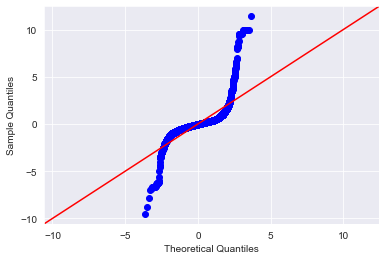

In [33]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

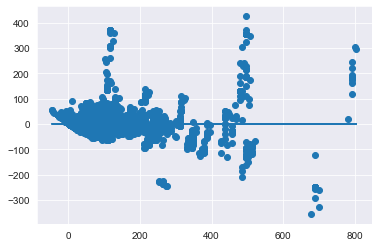

In [39]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [40]:
# Your code here - Check for outliers
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['list_price'].quantile(q=q)))

0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88


In [45]:
# Your code here
# Remove extreme outliers
orig_tot = len(df)
df = df[df.list_price < 220] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

# Rerun the model

Percent removed: 0.050045998160073595


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     529.8
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:21:36   Log-Likelihood:                -3597.8
No. Observations:                7744   AIC:                             7300.
Df Residuals:                    7692   BIC:                             7661.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.6362      0.014    263.015      0.000       3.609       3.663
piece_count                                          1.2776      0.018     70.912      0.000       1.242       1.313
num_reviews                                         -0.0261      0.008     -3.189      0.001      -0.042      -0.010
play_star_rating                                     0.0789      0.005     14.743      0.000       0.068       0.089
val_star_rating                                     -0.1281      0.005    -23.782      0.000      -0.139      -0.118
ages_10_16                                           0.0429      0.041      1.038      0.299      -0.038       0.124
ages_10_21                                           0.7575      0.036     21.220      0.000       0.688       0.828
ages_11_16                                          -1.5397      0.081    -19.090      0.000      -1.698      -1.382
ages_12_16                                          -0.5454      0.105     -5.212      0.000      -0.751      -0.340
ages_14                                             -0.4760      0.076     -6.263      0.000      -0.625      -0.327
ages_2_5                                             0.6494      0.020     33.129      0.000       0.611       0.688
ages_5_12                                           -0.4904      0.028    -17.376      0.000      -0.546      -0.435
ages_6                                              -0.8419      0.060    -14.012      0.000      -0.960      -0.724
ages_6_12                                           -0.1143      0.018     -6.460      0.000      -0.149      -0.080
ages_7_12                                            0.1130      0.022      5.121      0.000       0.070       0.156
ages_7_14                                            0.0442      0.019      2.301      0.021       0.007       0.082
ages_8                                               0.4730      0.051      9.251      0.000       0.373       0.573
ages_8_12                                            0.1150      0.029      4.014      0.000       0.059       0.171
ages_8_14                                            0.2264      0.021     10.742      0.000       0.185       0.268
ages_9                                               0.4135      0.109      3.779      0.000       0.199       0.628
ages_9_12                                            0.1190      0.071      1.666      0.096      -0.021       0.259
ages_9_14                                            0.0427      0.032      1.350      0.177      -0.019       0.105
theme_name_BOOST                                     0.7372      0.111      6.668      0.000       0.520       0.954
theme_name_Blues_Helicopter_Pursuit      

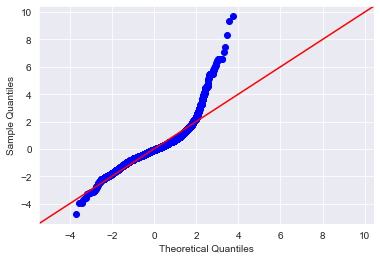

In [42]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

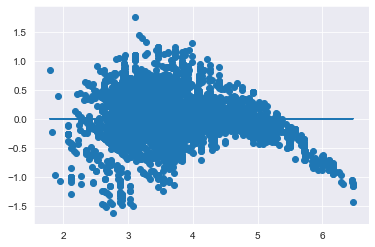

In [46]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 